In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

In [47]:
m0 = 4 #tamano de la semilla
m = 2 #numero de enlaces que tiene cada nuevo nodo
G = nx.Graph()
for i in range(m0):
    G.add_node(i)
G.add_edges_from(list(permutations(list(G),2))) #se hace una red completa de tamano m0


for i in range(len(G),15000): #para 100000 ya tarda un rato
    grados = np.array(list(dict(G.degree).values()))
    probabilidades = grados / sum(grados)
    nodos = np.random.choice(list(G), size = m, p = probabilidades, replace = False)
    G.add_node(i)
    for j in nodos:
        G.add_edge(i, j)

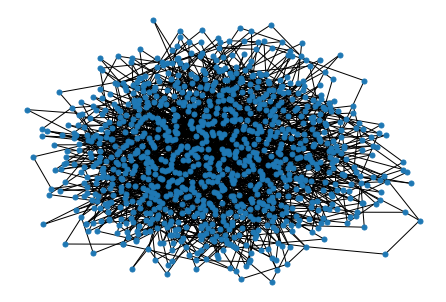

In [6]:
# solo visualizar para N <= 1000
#nx.draw(G, node_size = 25)

In [48]:
Degree = [val for (node, val) in G.degree()]
Degree = np.array(Degree)
len(Degree)

15000

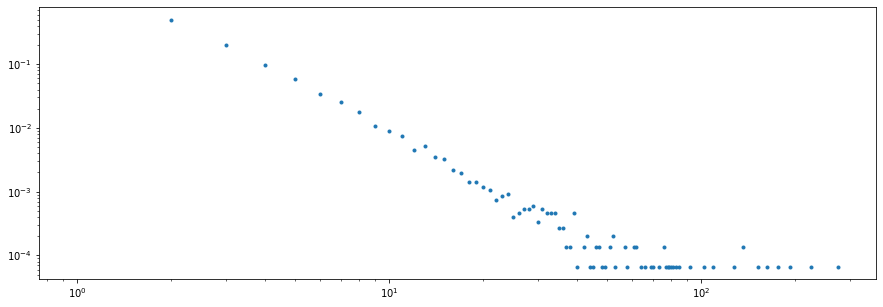

In [49]:
K = Degree.max()
y0, x0 = np.histogram(Degree,
                      bins = range(int(K) + 2),
                      density = True)

plt.figure(figsize = [15,5])
plt.plot(x0[:-1], y0, '.')
plt.xscale('log')
plt.yscale('log')

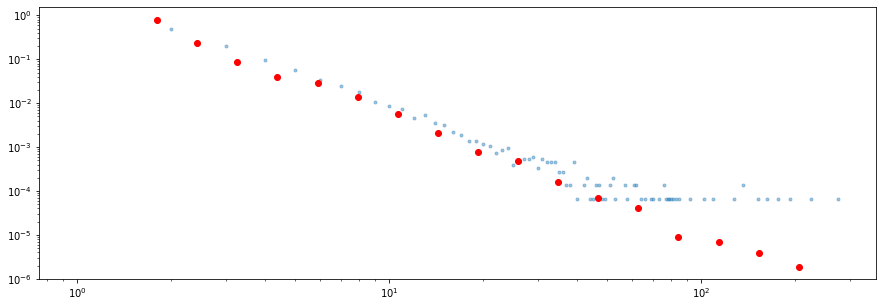

In [50]:
log_bins = np.logspace(0, np.log10(K+2), 20)

y, x = np.histogram(Degree,
                    bins = log_bins,
                    density = True,
                    )

plt.figure(figsize = [15,5])
plt.plot(x0[:-1], y0, '.', alpha = .4)

plt.plot(x[:-1], y, 'ro')

plt.xscale('log')
plt.yscale('log')

In [51]:
!pip install powerlaw

In [52]:
import powerlaw

In [53]:
fit = powerlaw.Fit(Degree)

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [54]:
fit.alpha

3.029481790005141

In [55]:
fit.xmin

10.0

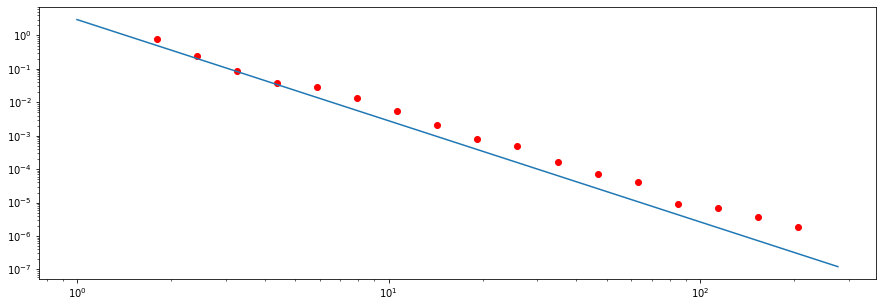

In [65]:
plt.figure(figsize = [15,5])

plt.plot(x[:-1], y, 'ro')
plt.plot(x, 3*x**(-fit.alpha))

plt.xscale('log')
plt.yscale('log')

# Análisis de grado

[]

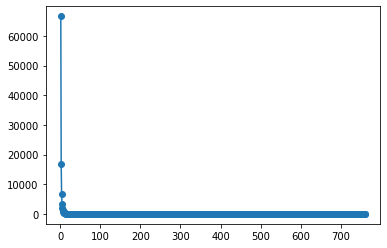

In [ ]:
grados = list(dict(G.degree).values())

y, x = np.histogram(grados, bins = max(grados))
x_med = (x[:-1] + x[1:])*.5

plt.plot(x_med, y, 'o-')
#plt.yscale('log')
#plt.xscale('log')
plt.plot()

[]

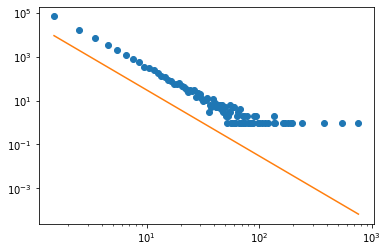

In [ ]:
y, x = np.histogram(grados, bins = max(grados))
x_med = (x[:-1] + x[1:])*.5

plt.plot(x_med, y, 'o')
plt.plot(x_med, 30000*x_med**(-3.), '-')
plt.yscale('log')
plt.xscale('log')
plt.plot()

In [ ]:
max_log = np.log10(max(grados))
log_bin = np.logspace(0, max_log, 20)

[]

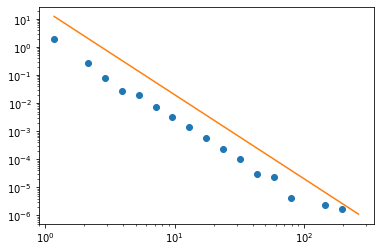

In [ ]:
y, x = np.histogram(grados, bins = log_bin, density = True)
x_med = (x[:-1] + x[1:])*.5

plt.plot(x_med, y, 'o')
plt.plot(x_med, 20*x_med**(-3.), '-')

plt.yscale('log')
plt.xscale('log')
plt.plot()